In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
# DATA SETS NEED TO BE MOUNTED TO GDRIVE OR UPLOADED TO THE COLAB RUNTIME
# AND THE PATH NEEDS TO PASTED BELOW.
train_data = pd.read_csv('/content/drive/MyDrive/PRML/Assign1/dataset1/train21.csv', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/PRML/Assign1/dataset1/test21.csv', header=None)

# DROP COLUMN 1
train_data = train_data.drop([1], axis=1)
test_data = test_data.drop([1], axis=1)

In [ ]:
#SPLITTING DATA
frac = 0.75
val_data = train_data[int(frac*len(train_data)):]
train_data = train_data[:int(frac*len(train_data))]

In [ ]:
#NORMALISE DATA USING Z-SCORE
def normalize(matrix):
    mean = np.mean(matrix)
    std = np.std(matrix)
    matrix = (matrix - mean)/std  # normalized matrix
    return matrix

# normalise only first column
train_data.iloc[:,0] = normalize(train_data.iloc[:,0])
val_data.iloc[:,0] = normalize(val_data.iloc[:,0])
test_data.iloc[:,0] = normalize(test_data.iloc[:,0])

train_data = train_data.values
test_data = test_data.values
val_data = val_data.values


#print(train_data)
#print(val_data)

In [ ]:
#ANY DEGREE POLYNOMIAL REGRESSION
#build model for only one column
def build_model(X, Y, degree):
    ones = np.ones(len(X))
    terms = np.array([]).reshape(0, len(X))
    terms = np.vstack((terms, ones))
    for d in range(1, degree+1):
        terms = np.vstack((terms, X**d))
    X = terms.T
    Y = np.array(Y).reshape(len(Y), 1)
    beta = np.linalg.pinv(X).dot(Y)
    return beta

#predict for only one column
def predict(X, b, degree):
    ones = np.ones(len(X))
    terms = np.array([]).reshape(0, len(X))
    terms = np.vstack((terms, ones))
    for d in range(1, degree+1):
        terms = np.vstack((terms, X**d))
    X = terms.T
    Ys = X.dot(b)
    Ys.shape = (len(Ys),)
    return Ys

def absolute_error(Y, Ys):
    return abs(Y - Ys)

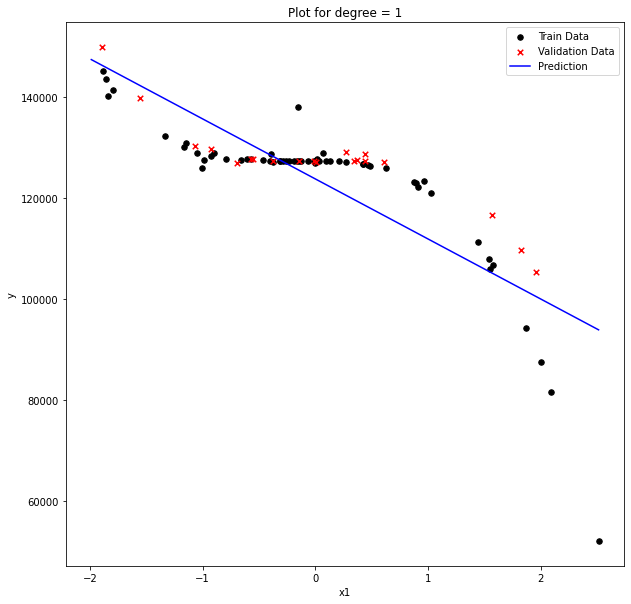

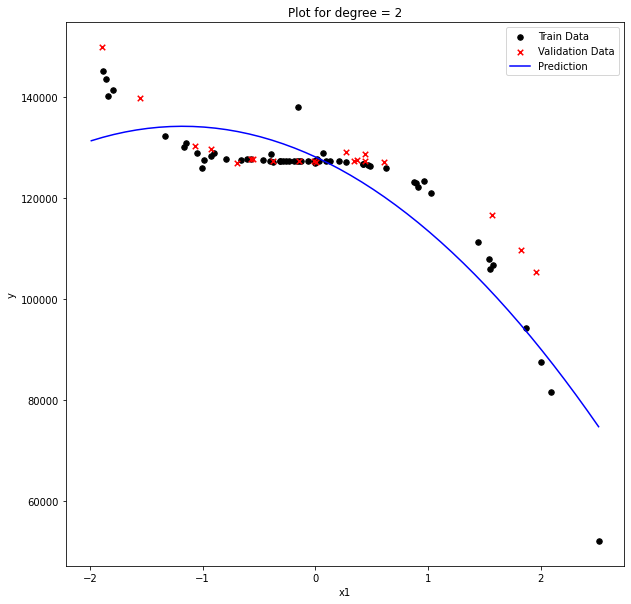

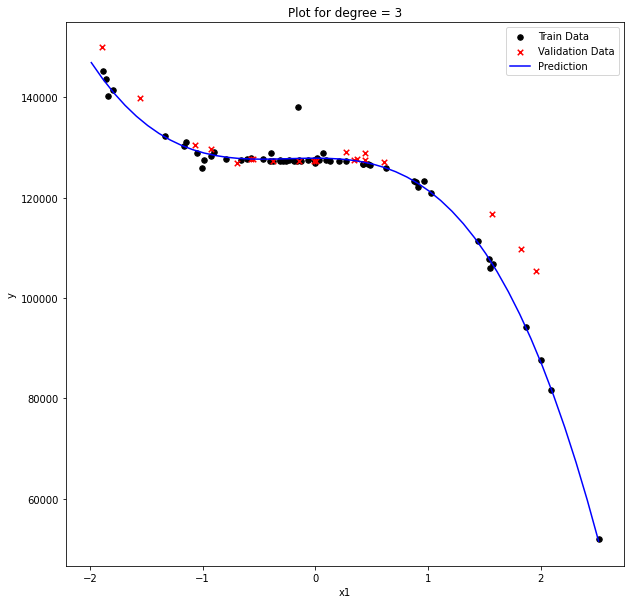

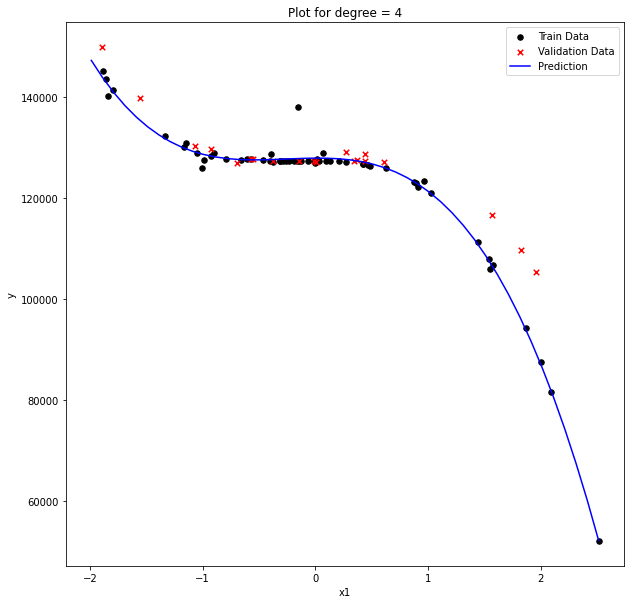

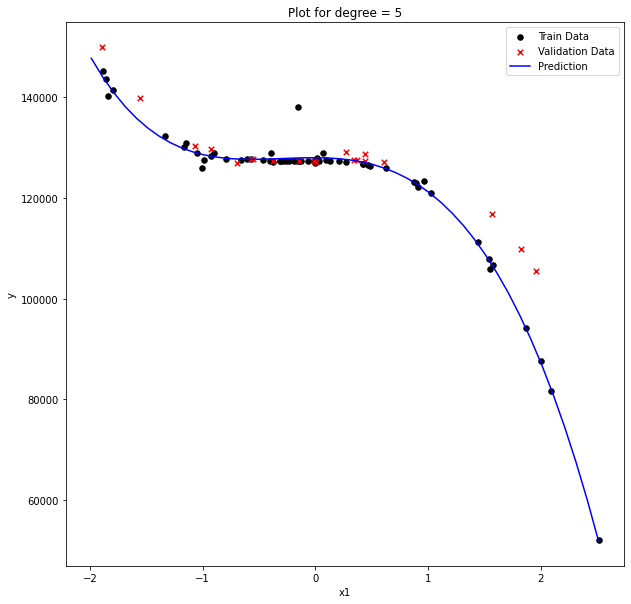

In [ ]:
#PLOTTING FOR MULTIPLE DEGREES
degrees = [1, 2, 3, 4, 5]

#plotting for only one column
for degree in degrees:
    beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model
    #Y_train = predict(train_data[:,0], beta, degree) # predict the train data
    #Y_val = predict(val_data[:,0], beta, degree) # predict the validation data

    step = 0.1

    x = np.arange(train_data[:,0].min()-step, train_data[:,0].max() + step, step)
    y = predict(x, beta, degree)

    plt.figure(figsize=(10, 10))
    plt.scatter(train_data[:,0], train_data[:,1], label="Train Data", c = 'black', s = 30)
    plt.scatter(val_data[:,0], val_data[:,1], label="Validation Data", c = 'red', s = 30, marker = 'x')
    plt.plot(x, y, label="Prediction", c = 'blue')
    plt.title('Plot for degree = '+ str(degree))
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.legend()


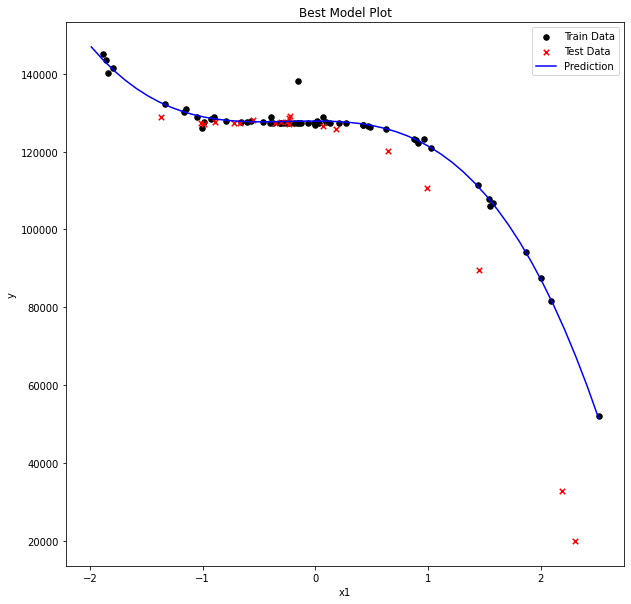

In [ ]:
# PLOTTING PREDICTED SURFACE
degree = 3 #BEST MODEL

beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model

step = 0.1

x = np.arange(train_data[:,0].min()-step, train_data[:,0].max() + step, step)
y = predict(x, beta, degree)

plt.figure(figsize=(10, 10))
plt.scatter(train_data[:,0], train_data[:,1], label="Train Data", c = 'black', s = 30)
plt.scatter(test_data[:,0], test_data[:,1], label="Test Data", c = 'red', s = 30, marker = 'x')
plt.plot(x, y, label="Prediction", c = 'blue')
plt.title('Best Model Plot')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

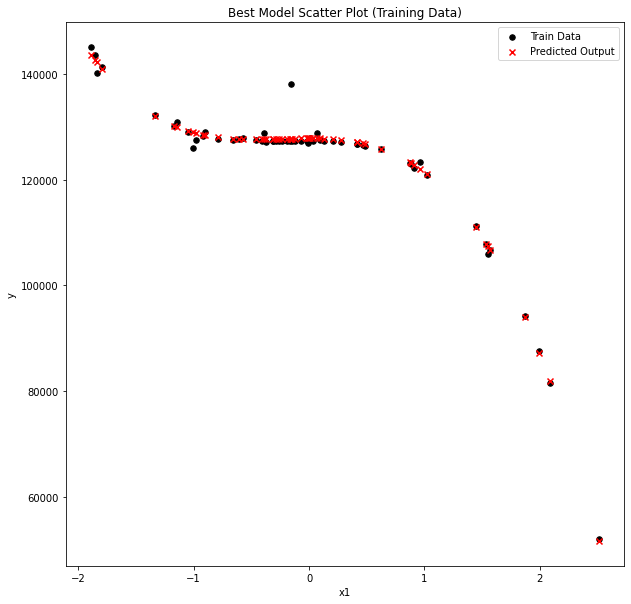

In [ ]:
# BEST MODEL SCATTERPLOT (TRAINING DATA)
degree = 3 #BEST MODEL

beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model

plt.figure(figsize=(10, 10))
plt.scatter(train_data[:,0], train_data[:,1], label="Train Data", c = 'black', s = 30)
plt.scatter(train_data[:, 0], predict(train_data[:,0], beta, degree), label="Predicted Output", marker = "x", c = "red")

plt.title('Best Model Scatter Plot (Training Data)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

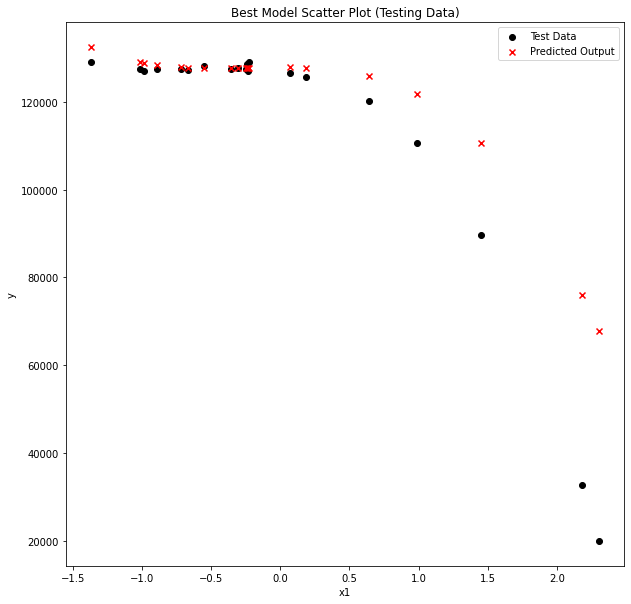

In [ ]:
# BEST MODEL SCATTERPLOT (TESTING DATA)
degree = 3 #BEST MODEL

beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model

plt.figure(figsize=(10, 10))
plt.scatter(test_data[:,0], test_data[:,1], label="Test Data", c = "black")
plt.scatter(test_data[:,0], predict(test_data[:,0], beta, degree), label="Predicted Output", marker = "x", c = "red")

plt.title('Best Model Scatter Plot (Testing Data)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

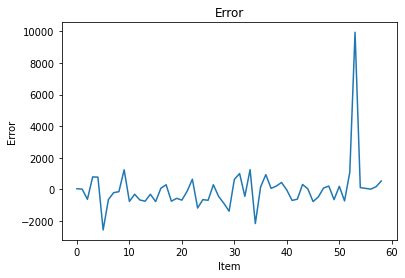

In [ ]:
def calculateError(degree):
  beta = build_model(train_data[:,0], train_data[:,1], degree)
  Y_train = predict(train_data[:,0], beta, degree) # predict the train data
  delY_train = train_data[:,1] - Y_train

  return delY_train

e = calculateError(9)
#print(e)

plt.title('Error')
plt.xlabel('Item')
plt.ylabel('Error')
index = np.arange(0, len(train_data[:,0]))
plt.plot(index, e)

[30202317.14794798, 30963251.95360292, 30361447.461290944, 30533473.231732935, 30455219.39829284, 30697500.789425798, 31936505.66720153]


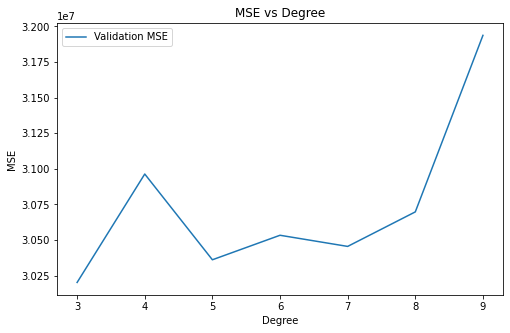

In [ ]:
def calulateMSE_test(degree):
    beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model
    Y_test = predict(test_data[:,0], beta, degree)   # predict the test data

    # Absolute Error
    delY_test = absolute_error(test_data[:,1], Y_test)
    MSE = np.sum(delY_test**2)/delY_test.size
    return MSE

def calulateMSE_train(degree):
    beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model
    Y_train = predict(train_data[:,0], beta, degree) # predict the train data

    # Absolute Error
    delY_train = absolute_error(train_data[:,1], Y_train)

    MSE = np.sum(delY_train**2)/delY_train.size
    return MSE

def calulateMSE_val(degree):
    beta = build_model(train_data[:,0], train_data[:,1], degree) # build the model
    Y_val = predict(val_data[:,0], beta, degree)

    # Absolute Error
    delY_val = absolute_error(val_data[:,1], Y_val)

    MSE = np.sum(delY_val**2)/delY_val.size
    return MSE

l = 3
r = 10

# MSE_test = []
# for i in range(l, r):
#     MSE_test.append(calulateMSE_test(i))

MSE_val = []
for i in range(l, r):
    MSE_val.append(calulateMSE_val(i))


print(MSE_val)

#plot the graph
fig = plt.figure(figsize = (8,5))
plt.title('MSE vs Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
index = np.arange(l, r)
plt.plot(index, MSE_val, label = "Validation MSE")

# legend
plt.legend()

[2330589.287220724, 2305170.377714372, 2292168.9049058044, 2290024.0782293864, 2283990.9084862033, 2281249.7424292327, 2234679.623888495, 2187496.5124531738, 2187424.3172849314, 2181010.0549848583, 2178262.3803575174, 2159469.1611363464]


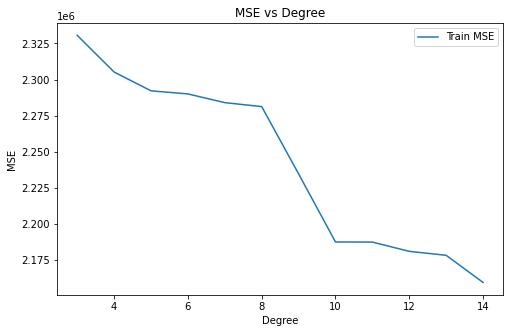

In [ ]:
l = 3
r = 15

MSE_train = []
for i in range(l, r):
    MSE_train.append(calulateMSE_train(i))

print(MSE_train)

#plot the graph
fig = plt.figure(figsize = (8,5))
plt.title('MSE vs Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
index = np.arange(l, r)
plt.plot(index, MSE_train, label = "Train MSE")
plt.legend()